In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
#load the dataset
data = pd.read_csv("D:\\DataSets\StockAnalysis\\tatasteel_stock_modified.csv", sep = '\t')

In [10]:
data.info()
data.shape
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Date     2000 non-null object
Price    2000 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.3+ KB


(2000, 2)

,Date,Price
0,31-Oct-18,548.65
1,30-Oct-18,564.50
2,29-Oct-18,573.70
3,26-Oct-18,551.55
4,25-Oct-18,545.75


In [11]:
#convert to datetime

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Date     2000 non-null datetime64[ns]
Price    2000 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.3 KB


In [14]:
#set Date column as index
data.set_index('Date', inplace=True)

In [15]:
data.head(10)
data.tail(10)

,Price
Date,
2018-10-31,548.65
2018-10-30,564.50
2018-10-29,573.70
2018-10-26,551.55
2018-10-25,545.75
2018-10-24,550.05
2018-10-23,545.60
2018-10-22,544.75
2018-10-19,554.95


,Price
Date,
2010-10-13,637.85
2010-10-12,633.35
2010-10-11,640.10
2010-10-08,626.60
2010-10-07,649.70
2010-10-06,678.25
2010-10-05,668.35
2010-10-04,669.70
2010-10-01,667.80


In [16]:
#weekly resampling

In [21]:
data_weekly = pd.DataFrame()
data_weekly['WeeklyPrice'] = data.Price.resample('W').mean()

In [22]:
#data_weekly.head()
#data_weekly.tail()

In [23]:
#consider only whole week
#data_weekly = data_weekly.truncate(before='2008-10-10', after='2018-10-28')

In [24]:
#Monthly Sampling
data_monthly = pd.DataFrame()
#data_weekly['WeeklyPrice'] = data.AdjClose.resample('W').mean()
data_monthly['MonthlyPrice'] = data.Price.resample('M').mean()

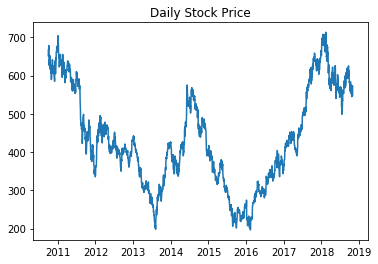

In [25]:
#Daily stock price plot
#plt.plot(data.index,data['AdjClose'])
plt.plot(data.index,data['Price'])
plt.title('Daily Stock Price')
plt.show();

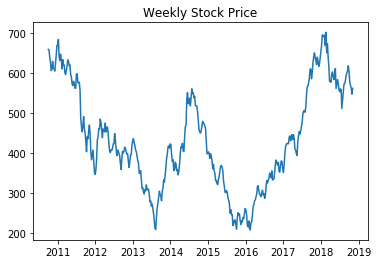

In [112]:
#weekly stock price plot
plt.plot(data_weekly.index,data_weekly['WeeklyPrice'])
plt.title('Weekly Stock Price')
plt.show();

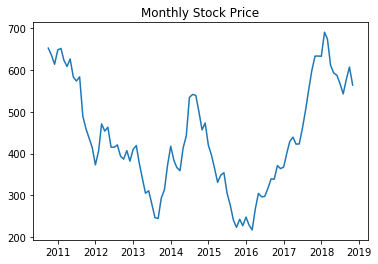

In [113]:
#monthly stock price plot
plt.plot(data_monthly.index,data_monthly['MonthlyPrice'])
plt.title('Monthly Stock Price')
plt.show();

In [28]:
#convert to series
ts = data_monthly['MonthlyPrice']

In [37]:
data_monthly.head()

,MonthlyPrice
Date,
2010-09-30,651.850000
2010-10-31,634.995238
2010-11-30,613.380952
2010-12-31,647.829545
2011-01-31,651.192500


In [38]:
ts.head()

Date
2010-09-30    651.850000
2010-10-31    634.995238
2010-11-30    613.380952
2010-12-31    647.829545
2011-01-31    651.192500
Freq: M, Name: MonthlyPrice, dtype: float64

In [30]:
ts.to_csv("D:\\DataSets\StockAnalysis\\ts_TataSteel_MonthlyPrice.csv")

In [31]:
#ts_monthly = data_monthly['MonthlyPrice']

In [32]:
from sklearn.model_selection import train_test_split

In [41]:
#divide into train and validation set
train, test = train_test_split(data_monthly, test_size = 0.2, random_state = 1)

In [42]:
len(train)
len(test)

78

20

In [43]:
train.head()
test.head()

,MonthlyPrice
Date,
2010-11-30,613.380952
2014-01-31,383.469565
2015-07-31,277.578261
2015-02-28,365.990000
2012-04-30,463.002632


,MonthlyPrice
Date,
2018-04-30,592.664286
2017-07-31,503.461429
2013-04-30,305.330000
2012-12-31,409.832500
2017-02-28,428.947895


In [44]:
#Simple Average Technique

In [48]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['MonthlyPrice'].mean()
'''plt.figure(figsize=(12,8))
plt.plot(train['MonthlyPrice'], label='Train')
plt.plot(test['MonthlyPrice'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast-Monthly')
plt.legend(loc='best')
plt.show();'''

"plt.figure(figsize=(12,8))\nplt.plot(train['MonthlyPrice'], label='Train')\nplt.plot(test['MonthlyPrice'], label='Test')\nplt.plot(y_hat_avg['avg_forecast'], label='Average Forecast-Monthly')\nplt.legend(loc='best')\nplt.show();"

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
rms = sqrt(mean_squared_error(test.MonthlyPrice, y_hat_avg.avg_forecast))
print(rms)

118.00149095950354


In [90]:
#Moving Average

In [110]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['MonthlyPrice'].rolling(12).mean().iloc[-1]
'''plt.figure(figsize=(16,8))
plt.plot(train['WeeklyPrice'], label='Train')
plt.plot(test['WeeklyPrice'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()'''

"plt.figure(figsize=(16,8))\nplt.plot(train['WeeklyPrice'], label='Train')\nplt.plot(test['WeeklyPrice'], label='Test')\nplt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')\nplt.legend(loc='best')\nplt.show()"

In [111]:
rms = sqrt(mean_squared_error(test.MonthlyPrice, y_hat_avg.moving_avg_forecast))
print(rms)

114.98491589939916


In [104]:
#Try Prophet model

In [53]:
data_monthly.head()

,MonthlyPrice
Date,
2010-09-30,651.850000
2010-10-31,634.995238
2010-11-30,613.380952
2010-12-31,647.829545
2011-01-31,651.192500


In [54]:
monthly_proph = data_monthly.copy(deep=True)

In [56]:
monthly_proph['ds'] = monthly_proph.index
monthly_proph['y'] = monthly_proph['MonthlyPrice']
monthly_proph.drop(['MonthlyPrice'], axis=1, inplace=True)

In [57]:
monthly_proph.head()

,ds,y
Date,,
2010-09-30,2010-09-30,651.850000
2010-10-31,2010-10-31,634.995238
2010-11-30,2010-11-30,613.380952
2010-12-31,2010-12-31,647.829545
2011-01-31,2011-01-31,651.192500


In [58]:
from fbprophet import Prophet

In [59]:
my_forecast = Prophet(interval_width=0.95)

In [60]:
my_forecast.fit(monthly_proph)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [61]:
forecast_periods = my_forecast.make_future_dataframe(periods=24, include_history=True, freq='M')
forecast_periods

,ds
0,2010-09-30
1,2010-10-31
2,2010-11-30
3,2010-12-31
4,2011-01-31
5,2011-02-28
6,2011-03-31
7,2011-04-30
8,2011-05-31
9,2011-06-30


In [62]:
forecast = my_forecast.predict(forecast_periods)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,537.605637,391.716535,703.612874,537.605637,537.605637,11.981642,11.981642,11.981642,11.981642,11.981642,11.981642,0.0,0.0,0.0,549.587279
1,2010-10-31,533.025767,377.833646,697.754634,533.025767,533.025767,10.749433,10.749433,10.749433,10.749433,10.749433,10.749433,0.0,0.0,0.0,543.775200
2,2010-11-30,528.593634,387.601637,693.058463,528.593634,528.593634,12.242220,12.242220,12.242220,12.242220,12.242220,12.242220,0.0,0.0,0.0,540.835854
3,2010-12-31,524.013763,387.202857,691.665400,524.013763,524.013763,14.035447,14.035447,14.035447,14.035447,14.035447,14.035447,0.0,0.0,0.0,538.049210
4,2011-01-31,519.433892,379.232212,698.252259,519.433892,519.433892,16.989841,16.989841,16.989841,16.989841,16.989841,16.989841,0.0,0.0,0.0,536.423733


In [63]:
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()
forecast1.tail()

,ds,yhat
0,2010-09-30,549.587279
1,2010-10-31,543.775200
2,2010-11-30,540.835854
3,2010-12-31,538.049210
4,2011-01-31,536.423733


,ds,yhat
117,2020-06-30,732.447423
118,2020-07-31,735.974256
119,2020-08-31,738.424607
120,2020-09-30,754.167446
121,2020-10-31,763.273681


In [64]:
forecast1

,ds,yhat
0,2010-09-30,549.587279
1,2010-10-31,543.775200
2,2010-11-30,540.835854
3,2010-12-31,538.049210
4,2011-01-31,536.423733
5,2011-02-28,552.688304
6,2011-03-31,515.228767
7,2011-04-30,513.052203
8,2011-05-31,500.800417
9,2011-06-30,498.311063


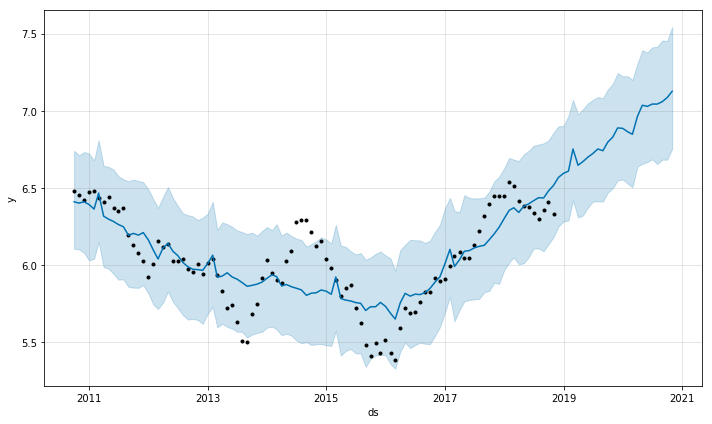

In [115]:
my_forecast.plot(forecast, uncertainty=True);

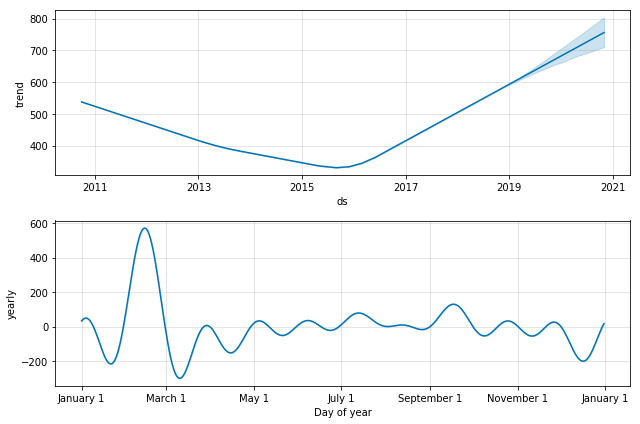

In [66]:
my_forecast.plot_components(forecast);

In [68]:
final_df = pd.merge(forecast1, monthly_proph, on = 'ds', how = 'inner')

In [69]:
final_df.head()
final_df.tail()

,ds,yhat,y
0,2010-09-30,549.587279,651.850000
1,2010-10-31,543.775200,634.995238
2,2010-11-30,540.835854,613.380952
3,2010-12-31,538.049210,647.829545
4,2011-01-31,536.423733,651.192500


,ds,yhat,y
93,2018-06-30,550.611237,567.471429
94,2018-07-31,558.432101,542.602273
95,2018-08-31,557.415898,577.616667
96,2018-09-30,582.294924,606.658333
97,2018-10-31,588.624381,563.697619


In [70]:
#compute accuracy of the forecast

In [71]:
import numpy as np
from sklearn import metrics

In [72]:
np.round(metrics.mean_absolute_error(final_df.yhat, final_df.y),0)

67.0

In [73]:
forecast.head()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,537.605637,391.716535,703.612874,537.605637,537.605637,11.981642,11.981642,11.981642,11.981642,11.981642,11.981642,0.0,0.0,0.0,549.587279
1,2010-10-31,533.025767,377.833646,697.754634,533.025767,533.025767,10.749433,10.749433,10.749433,10.749433,10.749433,10.749433,0.0,0.0,0.0,543.775200
2,2010-11-30,528.593634,387.601637,693.058463,528.593634,528.593634,12.242220,12.242220,12.242220,12.242220,12.242220,12.242220,0.0,0.0,0.0,540.835854
3,2010-12-31,524.013763,387.202857,691.665400,524.013763,524.013763,14.035447,14.035447,14.035447,14.035447,14.035447,14.035447,0.0,0.0,0.0,538.049210
4,2011-01-31,519.433892,379.232212,698.252259,519.433892,519.433892,16.989841,16.989841,16.989841,16.989841,16.989841,16.989841,0.0,0.0,0.0,536.423733


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
117,2020-06-30,726.181171,573.340954,889.322831,691.740130,763.328159,6.266252,6.266252,6.266252,6.266252,6.266252,6.266252,0.0,0.0,0.0,732.447423
118,2020-07-31,733.742837,583.283009,886.059479,696.137286,773.616952,2.231418,2.231418,2.231418,2.231418,2.231418,2.231418,0.0,0.0,0.0,735.974256
119,2020-08-31,741.304503,583.677120,886.320375,700.507769,783.822706,-2.879896,-2.879896,-2.879896,-2.879896,-2.879896,-2.879896,0.0,0.0,0.0,738.424607
120,2020-09-30,748.622244,591.853170,921.234892,705.643020,793.554762,5.545202,5.545202,5.545202,5.545202,5.545202,5.545202,0.0,0.0,0.0,754.167446
121,2020-10-31,756.183910,592.549585,926.594945,710.351603,804.036263,7.089771,7.089771,7.089771,7.089771,7.089771,7.089771,0.0,0.0,0.0,763.273681


In [74]:
forecast1.head()
forecast1.tail()

,ds,yhat
0,2010-09-30,549.587279
1,2010-10-31,543.775200
2,2010-11-30,540.835854
3,2010-12-31,538.049210
4,2011-01-31,536.423733


,ds,yhat
117,2020-06-30,732.447423
118,2020-07-31,735.974256
119,2020-08-31,738.424607
120,2020-09-30,754.167446
121,2020-10-31,763.273681


In [75]:
forecast['Year'] = forecast['ds'].dt.year

In [76]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Year
0,2010-09-30,537.605637,391.716535,703.612874,537.605637,537.605637,11.981642,11.981642,11.981642,11.981642,11.981642,11.981642,0.0,0.0,0.0,549.587279,2010
1,2010-10-31,533.025767,377.833646,697.754634,533.025767,533.025767,10.749433,10.749433,10.749433,10.749433,10.749433,10.749433,0.0,0.0,0.0,543.775200,2010
2,2010-11-30,528.593634,387.601637,693.058463,528.593634,528.593634,12.242220,12.242220,12.242220,12.242220,12.242220,12.242220,0.0,0.0,0.0,540.835854,2010
3,2010-12-31,524.013763,387.202857,691.665400,524.013763,524.013763,14.035447,14.035447,14.035447,14.035447,14.035447,14.035447,0.0,0.0,0.0,538.049210,2010
4,2011-01-31,519.433892,379.232212,698.252259,519.433892,519.433892,16.989841,16.989841,16.989841,16.989841,16.989841,16.989841,0.0,0.0,0.0,536.423733,2011


In [77]:
forecast_18 = forecast[forecast['Year'] == 2018]

In [78]:
forecast_19 = forecast[forecast['Year'] == 2019]

In [79]:
forecast2_18_19 = pd.concat([forecast_18, forecast_19])

In [81]:
forecast2_18_19_1 = forecast2_18_19.loc[:,['ds','yhat']]
forecast2_18_19_1

,ds,yhat
88,2018-01-31,540.305606
89,2018-02-28,541.771668
90,2018-03-31,529.047203
91,2018-04-30,542.226265
92,2018-05-31,541.532247
93,2018-06-30,550.611237
94,2018-07-31,558.432101
95,2018-08-31,557.415898
96,2018-09-30,582.294924
97,2018-10-31,588.624381


In [116]:
#save the forecasted values

In [117]:
forecast2_18_19_1.to_csv("D:\\datasets\\StockAnalysis\\TataMotors_Monthly_Predicted_FBProphet.csv")